In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

                     wave  stfips  st      recnumbr repdate         dob  \
0  Age 17 Baseline Survey  Alaska  AK  450290395006  201103  1993-10-15   
1  Age 17 Baseline Survey  Alaska  AK  450448396586  201103  1993-12-15   
2  Age 17 Baseline Survey  Alaska  AK  450461296715  201103  1993-10-15   
3  Age 17 Baseline Survey  Alaska  AK  450540097503  201103  1993-10-15   
4  Age 17 Baseline Survey  Alaska  AK  450652098623  201103  1994-02-15   

      sex amiakn asian blkafram       ...       baseline fy11cohort elig19  \
0  female     no    no       no       ...            yes        yes    yes   
1  female    yes    no       no       ...            yes        yes    yes   
2  female     no    no       no       ...            yes         no     no   
3  female     no    no       no       ...            yes        yes    yes   
4    male     no    no       no       ...            yes        yes    yes   

  elig21 samplestate insample responded                              race  \
0  

Text(0.5,0,'Homeless')

Text(0,0.5,'Count of Foster Youth')

Text(0.5,1,'Homeless Youth')

Text(0.5,0,'Incarerated')

Text(0,0.5,'Count of Foster Youth')

Text(0.5,1,'Incarcerated Youth')

wave               0
stfips             0
st                 0
recnumbr           0
repdate            0
dob                0
sex               75
amiakn             0
asian              0
blkafram           0
hawaiipi           0
white              0
raceunkn           0
racedcln           0
hisorgin          22
outcmrpt         102
outcmdte           0
outcmfcs          78
currfte            0
currpte            0
emplysklls         0
socsecrty         78
educaid           78
pubfinas          78
pubfoodas         78
pubhousas         80
othrfinas         78
highedcert       152
currenroll        80
cnctadult         78
homeless          91
subabuse          78
incarc            78
children          79
marriage          78
medicaid           0
othrhlthin        78
medicalin         78
mentlhlthin       78
prescripin        78
baseline           0
fy11cohort         0
elig19             0
elig21         44701
samplestate        0
insample       19237
responded          0
race         

AttributeError: 'DataFrame' object has no attribute 'dtype'

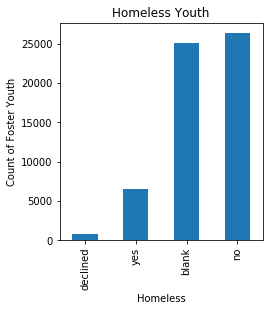

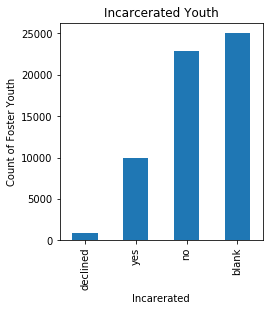

In [18]:
df = pd.read_stata('~/desktop/foster.dta')

print(df.head())

df.info()

print(df.describe())

print(df.shape)

print(df['homeless'].describe())

temp1 = df['homeless'].value_counts(ascending=True)
temp2 = df.pivot_table(values='incarc',index='homeless',aggfunc=lambda x: x.map({'Yes':1,'No':0}).mean())
print('Frequency Table of Homeless Incarcerated')
print(temp1)
print('\nProbability of being Homeless and Incarcerated')
print(temp2)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Homeless')
ax1.set_ylabel('Count of Foster Youth')
ax1.set_title("Homeless Youth")
temp1.plot(kind='bar')

temp3 = df['incarc'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Incarerated')
ax1.set_ylabel('Count of Foster Youth')
ax1.set_title("Incarcerated Youth")
temp3.plot(kind='bar')

df.apply(lambda x: sum(x.isnull()),axis=0)

df.dtype

In [ ]:
df_cat = pd.DataFrame()
cat_var = ['sex','race','raceethn']
for i in cat_var:
    df_cat[i] = df_all[i].cat.codes
print(df_cat.head())
df_cat.describe()

In [ ]:
df.describe()

In [33]:
df_out = pd.read_stata('~/Desktop/foster_outcome.dta')

print(df_out.head(5))

                     wave          stfcid  stfips  st      recnumbr repdate  \
0  Age 17 Baseline Survey  AL000000007183       1  AL  000000007183  201403   
1  Age 17 Baseline Survey  AL000000038434       1  AL  000000038434  201409   
2  Age 17 Baseline Survey  AL000000046332       1  AL  000000046332  201403   
3  Age 17 Baseline Survey  AL000000059581       1  AL  000000059581  201403   
4  Age 17 Baseline Survey  AL000000121244       1  AL  000000121244  201409   

          dob     sex amiakn asian    ...    othrhlthin       medicalin  \
0  1996-10-15  female     no    no    ...            no             yes   
1  1997-05-15    male     no    no    ...            no             yes   
2  1996-10-15    male     no    no    ...            no  not applicable   
3  1996-11-15  female     no    no    ...         blank           blank   
4  1997-07-15  female     no    no    ...         blank           blank   

      mentlhlthin      prescripin baseline fy14cohort elig19 samplestate  

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_tot = pd.read_csv('~/Desktop/foster_total.csv', low_memory=False)

df_tot

df_tot.shape

,wave,st,recnumbr,repdate,dob,sex,amiakn,asian,blkafram,hawaiipi,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
1,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
2,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",18
3,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",19
4,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",20
5,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",21
6,Age 17 Baseline Survey,AK,4.50448E+11,201103,12/15/93,female,yes,no,no,no,...,No,No,No,No,No,No,Yes,AmInd / AK Native Only,"NH, AmInd / AK Native Only",17
7,Age 17 Baseline Survey,AK,4.50448E+11,201103,12/15/93,female,yes,no,no,no,...,No,No,No,No,No,No,No,AmInd / AK Native Only,"NH, AmInd / AK Native Only",17
8,Age 17 Baseline Survey,AK,4.50448E+11,201103,12/15/93,female,yes,no,no,no,...,No,No,No,No,No,No,Yes,AmInd / AK Native Only,"NH, AmInd / AK Native Only",18
9,Age 17 Baseline Survey,AK,4.50448E+11,201103,12/15/93,female,yes,no,no,no,...,No,No,No,No,No,No,No,AmInd / AK Native Only,"NH, AmInd / AK Native Only",18


(292116, 70)

In [34]:
df_serv = pd.read_stata('~/Desktop/foster_service.dta')

print(df_serv.head(5))

     fy  stfips  st repdate      recnumbr         dob     sex amiakn asian  \
0  2013       1  AL  201309  000000009831  1998-07-15  Female     No    No   
1  2014       1  AL  201409  000000009831  1998-07-15  Female     No    No   
2  2015       1  AL  201509  000000009831  1998-07-15  Female     No    No   
3  2011       1  AL  201109  000000014871  1996-08-15  Female     No    No   
4  2012       1  AL  201209  000000014871  1996-08-15  Female     No    No   

  blkafram  ...  famsuppsv mentorsv silsv rmbrdfasv educfinasv othrfinasv  \
0       No  ...        Yes       No    No        No         No         No   
1       No  ...        Yes       No    No        No         No         No   
2       No  ...        Yes       No    No        No         No         No   
3      Yes  ...         No       No    No        No         No         No   
4      Yes  ...         No       No    No        No         No         No   

           stfcid        race        raceethn agemp  
0  AL000000009

In [35]:
df_fost = pd.read_stata("~/Desktop/foster.dta")

df_fost

,wave,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,blkafram,...,baseline,fy11cohort,elig19,elig21,samplestate,insample,responded,race,raceethn,stfcid
0,Age 17 Baseline Survey,Alaska,AK,450290395006,201103,1993-10-15,female,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450290395006
1,Age 17 Baseline Survey,Alaska,AK,450448396586,201103,1993-12-15,female,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK450448396586
2,Age 17 Baseline Survey,Alaska,AK,450461296715,201103,1993-10-15,female,no,no,no,...,yes,no,no,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450461296715
3,Age 17 Baseline Survey,Alaska,AK,450540097503,201103,1993-10-15,female,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450540097503
4,Age 17 Baseline Survey,Alaska,AK,450652098623,201103,1994-02-15,male,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450652098623
5,Age 17 Baseline Survey,Alaska,AK,450660898711,201103,1993-12-15,male,yes,no,no,...,yes,no,no,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK450660898711
6,Age 17 Baseline Survey,Alaska,AK,451448406587,201109,1994-05-15,female,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK451448406587
7,Age 17 Baseline Survey,Alaska,AK,451453006633,201103,1994-02-15,male,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,Hispanic (Any Race),AK451453006633
8,Age 17 Baseline Survey,Alaska,AK,451560107704,201103,1994-03-15,male,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,More Than One Race,"NH, More than One Race",AK451560107704
9,Age 17 Baseline Survey,Alaska,AK,451586507968,201103,1993-10-15,female,no,no,yes,...,yes,yes,yes,NaN,no,NaN,yes,Black or African American,"NH, Black",AK451586507968


In [36]:
del df_fost['stfips']
del df_fost['fy11cohort']
del df_fost['elig21']
del df_fost['race']
del df_fost['raceethn']
del df_out['stfips']
del df_out['fy14cohort']
del df_serv['st']
del df_serv['repdate']
del df_serv['recnumbr']
del df_serv['dob']
del df_serv['sex']
del df_serv['amiakn']
del df_serv['blkafram']
del df_serv['hawaiipi']
del df_serv['white']
del df_serv['raceunkn']
del df_serv['racedcln']
del df_serv['hisorgin']
del df_serv['asian']

In [37]:
frames = [df_fost,df_out]
df_com = pd.concat(frames)

df_com
df_com.shape

df_all = df_com.set_index('stfcid').join(df_serv.set_index('stfcid'), lsuffix='_df_com', 
                                rsuffix='_df_serv')

df_all
df_all.shape


,amiakn,asian,baseline,blkafram,children,cnctadult,currenroll,currfte,currpte,dob,...,repdate,responded,samplestate,sex,socsecrty,st,stfcid,subabuse,wave,white
0,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,201103,yes,no,female,yes,AK,AK450290395006,yes,Age 17 Baseline Survey,yes
1,yes,no,yes,no,no,yes,yes,no,no,1993-12-15,...,201103,yes,no,female,no,AK,AK450448396586,no,Age 17 Baseline Survey,no
2,no,no,yes,no,yes,yes,yes,yes,yes,1993-10-15,...,201103,yes,no,female,yes,AK,AK450461296715,yes,Age 17 Baseline Survey,yes
3,no,no,yes,no,no,yes,yes,no,yes,1993-10-15,...,201103,yes,no,female,yes,AK,AK450540097503,no,Age 17 Baseline Survey,yes
4,no,no,yes,no,no,yes,yes,no,no,1994-02-15,...,201103,yes,no,male,no,AK,AK450652098623,no,Age 17 Baseline Survey,yes
5,yes,no,yes,no,yes,yes,yes,yes,yes,1993-12-15,...,201103,yes,no,male,yes,AK,AK450660898711,yes,Age 17 Baseline Survey,no
6,yes,no,yes,no,no,yes,yes,no,no,1994-05-15,...,201109,yes,no,female,no,AK,AK451448406587,no,Age 17 Baseline Survey,no
7,no,no,yes,no,no,yes,yes,no,declined,1994-02-15,...,201103,yes,no,male,declined,AK,AK451453006633,yes,Age 17 Baseline Survey,yes
8,yes,no,yes,no,no,yes,yes,no,no,1994-03-15,...,201103,yes,no,male,no,AK,AK451560107704,no,Age 17 Baseline Survey,yes
9,no,no,yes,yes,no,yes,yes,no,no,1993-10-15,...,201103,yes,no,female,no,AK,AK451586507968,yes,Age 17 Baseline Survey,no


(98991, 45)

,amiakn,asian,baseline,blkafram,children,cnctadult,currenroll,currfte,currpte,dob,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",18
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",19
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,No,White Only,"NH, White Only",20
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",21
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",18


(328428, 69)

In [38]:
df_all.dtypes
missing = ['pubfoodas','pubhousas','racedcln','raceunkn','recnumbr','repdate','responded','samplestate','sex']
for i in missing:
    df_all[i].dtypes

amiakn         category
asian          category
baseline         object
blkafram       category
children       category
cnctadult      category
currenroll     category
currfte        category
currpte        category
dob              object
educaid        category
elig19         category
emplysklls     category
hawaiipi       category
highedcert     category
hisorgin         object
homeless       category
incarc         category
insample       category
marriage       category
medicaid       category
medicalin      category
mentlhlthin    category
othrfinas      category
othrhlthin       object
outcmdte         object
outcmfcs         object
outcmrpt       category
prescripin     category
pubfinas       category
                 ...   
socsecrty      category
st               object
subabuse       category
wave             object
white          category
fy              float64
stfips          float64
fcstatsv       category
lclfipssv      category
tribesv        category
delinqntsv     c

category

category

dtype('O')

category

dtype('O')

dtype('O')

category

category

category

In [39]:
df_all.isnull().sum()
for i in missing:
    df_all[i].isnull().sum()

amiakn             0
asian              0
baseline           0
blkafram           0
children          87
cnctadult         86
currenroll        93
currfte            0
currpte            0
dob                0
educaid           86
elig19             0
emplysklls         0
hawaiipi           0
highedcert       283
hisorgin          96
homeless         108
incarc            86
insample       73281
marriage          86
medicaid           0
medicalin         86
mentlhlthin       86
othrfinas         86
othrhlthin        86
outcmdte           0
outcmfcs          86
outcmrpt         117
prescripin        86
pubfinas          86
               ...  
socsecrty         86
st                 0
subabuse          86
wave               0
white              0
fy             36312
stfips         36312
fcstatsv       36312
lclfipssv      36312
tribesv        36312
delinqntsv     36312
edlevlsv       36312
specedsv       36312
ilnasv         36312
acsuppsv       36312
psedsuppsv     36312
careersv     

86

99

0

0

0

0

0

0

75

In [40]:
var = list(df_all.select_dtypes(include=["category"]))
for i in var:
    df_all[i] = df_all[i].cat.add_categories("0").fillna("0")

In [41]:
na_var = ['hisorgin','othrhlthin','outcmfcs','fy','stfips']
for i in na_var:
    df_all[i]= df_all[i].fillna(0)

In [42]:
df_all.to_csv("~/Desktop/foster_all.csv")

In [43]:
df['homeless'].head(5)
df['blkafram']

0     no
1     no
2    yes
3    yes
4    yes
Name: homeless, dtype: category
Categories (4, object): [no < yes < declined < blank]

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9        yes
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20       yes
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
58699     no
58700     no
58701     no
58702     no
58703     no
58704     no
58705     no
58706     no
58707     no
58708     no
58709     no
58710     no
58711     no
58712     no
58713     no
58714    yes
58715     no
58716     no
58717     no
58718     no
58719     no
58720     no
58721     no
58722     no
58723     no
58724     no
58725     no
58726     no
58727     no
58728     no
Name: blkafram, Length: 58729, dtype: category
Categories (3, object): [no < yes < Unknown]

In [44]:
# Creating dictionaries in order to score survey responses in preparation for model creation.
# List of variables were grouped according to the scoring dictionary that they will use.

df_prep = pd.DataFrame()

df_model = pd.DataFrame()

non_var = ['dob','elig19','insample','outcmdte','recnumbr', 'repdate',
           'responded','samplestate','st','fy','stfips','agemp','baseline','lclfipssv']

code_var = ['sex','race','raceethn','fcstatsv']

other_var = ['children','cnctadult','currenroll','currfte','currpte','educaid','emplysklls',
           'highedcert','homeless','incarc','marriage','medicaid','medicalin',
           'mentlhlthin','othrfinas','othrhlthin','outcmfcs','outcmrpt','prescripin',
           'pubfinas','pubfoodas','pubhousas','socsecrty','subabuse','fcstatsv',
           'tribesv','delinqntsv','edlevlsv','specedsv','ilnasv','acsuppsv',
           'psedsuppsv','careersv','emplytrsv','budgetsv','housedsv','hlthedsv',
           'famsuppsv','mentorsv','silsv','rmbrdfasv','educfinasv','othrfinasv']

model_var = ['amiakn','asian','blkafram','hawaiipi','hisorgin','racedcln','raceunkn','sex',
             'white','race','raceethn','wave','children','cnctadult','currenroll',
             'currfte','currpte','educaid','emplysklls','highedcert','homeless','incarc',
             'marriage','medicaid','medicalin','mentlhlthin','othrfinas','othrhlthin',
             'outcmfcs','outcmrpt','prescripin','pubfinas','pubfoodas','pubhousas',
             'socsecrty','subabuse','fcstatsv','tribesv','delinqntsv','edlevlsv',
             'specedsv','ilnasv','acsuppsv','psedsuppsv','careersv','emplytrsv',
             'budgetsv','housedsv','hlthedsv','famsuppsv','mentorsv','silsv','rmbrdfasv',
             'educfinasv','othrfinasv','agemp','stfips']

scored_var = ['cnctadult','currenroll','currfte','currpte','educaid','emplysklls',
              'highedcert','homeless','incarc','subabuse','fcstatsv',
              'tribesv','delinqntsv','edlevlsv','specedsv','ilnasv','acsuppsv',
              'psedsuppsv','careersv','emplytrsv','budgetsv','housedsv','hlthedsv',
              'famsuppsv','mentorsv','silsv','rmbrdfasv','educfinasv','othrfinasv','outcmrpt']

non_scored_var = ['amiakn','asian','blkafram','hawaiipi','hisorgin','racedcln','raceunkn',
                  'sex','white','race','raceethn','wave','children','marriage','medicaid',
                  'medicalin','mentlhlthin','othrfinas','othrhlthin','outcmfcs',
                  'prescripin','pubfinas','pubfoodas','pubhousas',
                  'socsecrty','agemp','stfips']

var_list_1 = ['homeless','incarc','subabuse']     

var_list_2 = ['highedcert']

var_list_3 = ['cnctadult','currenroll','currfte','currpte','emplysklls']

var_list_4 = ['outcmrpt']

var_list_5 = ['children','marriage']

var_list_6 = ['educaid','emplysklls','medicaid','medicalin',
              'mentlhlthin','othrfinas','othrhlthin','outcmfcs','prescripin',
              'pubfinas','pubfoodas','pubhousas','socsecrty']
var_list_7 = ['tribesv','delinqntsv','edlevlsv','specedsv','ilnasv',
              'acsuppsv','psedsuppsv','careersv','emplytrsv','budgetsv','housedsv',
              'hlthedsv','famsuppsv','mentorsv','silsv','rmbrdfasv','educfinasv','othrfinasv']

var_list_8 = ['fcstatsv']

var_list_9 = ['edlevlsv']

var_list_10 = ['hisorgin','racedcln','raceunkn']

var_list_11 = ['wave']

var_list_12 = ['amiakn','asian','blkafram','hawaiipi','white']

dat_dic_1 = dict({'no':3, 'yes':0, 'unknown':1, 'decline':1, 'blank':1,'do not know':1, 
                  'NA':1, 'not applicable':1, 'Zero':0})

dat_dic_2 = dict({'none of the above':0, 'vocational license':5, 
                  'vocational certificate':5,'higher degree':5,'associate degree':5,
                  'bachelor degree':5,'high school or ged':3, 'Zero':0})

dat_dic_3 = dict({'no':0, 'yes':3,'unknown':1, 'decline':1, 'blank':1,'do not know':1, 
                  'NA':1, 'not applicable':1, 'Zero':0})

dat_dic_4 = dict({'blank':1,'death':(-999),'incarcerated':0,'runaway or missing':0,
                  'incapacitated':0,'unable to locate':1,'declined':1,'not in sample':1,
                  'parent declined':1,'participated':3,'NA':1,'Zero':0})

dat_dic_5 = dict({'blank':0,'declined':0,'yes':1,'no':0,'Zero':0,'not applicable':0,
                  'do not know':0,'Blank':0,'Unknown':0,'Yes':1,'No':0})

dat_dic_6 = dict({'Yes, received services & was in FC':1,
                  'No, received services, but was not in FC':0,'Zero':0,'2':0})

dat_dic_7 = dict({'Less than 6th grade':0,'6th grade':1,'7th grade':2,'8th grade':3,
                  '9th grade':4,'10th grade':5,'11th grade':6,'12th grade':7,
                  'Post secondary':8,'College':9,'Blank':0,'Zero':0})

dat_dic_8 = dict({'Zero':0,'Age 17 Baseline Survey':1,'Age 19 Followup':2,
                  'Age 21 Followup':3})

for i in df_all:
    if i in var_list_1:
        df_prep[i] = df_all[i].map(dat_dic_1)
        
df_prep['highedcert'] = df_all['highedcert'].map(dat_dic_2)

for i in df_all:
    if i in var_list_3:
        df_prep[i] = df_all[i].map(dat_dic_3)

df_prep['outcmrpt'] = df_all['outcmrpt'].replace(dat_dic_4)

for i in df_all:
    if i in var_list_5:
        df_prep[i] = df_all[i].map(dat_dic_5)

for i in df_all:
    if i in var_list_6:
        df_prep[i] = df_all[i].map(dat_dic_5)
        
for i in df_all:
    if i in var_list_7:
        df_prep[i] = df_all[i].map(dat_dic_5)

df_prep['fcstatsv'] = df_all['fcstatsv'].replace(dat_dic_8)

df_prep['edlevlsv'] = df_all['edlevlsv'].map(dat_dic_7)

for i in df_all:
    if i in var_list_10:
        df_prep[i] = df_all[i].map(dat_dic_5)
        
df_prep['wave'] = df_all['wave'].map(dat_dic_8)
        
for i in df_all:
    if i in var_list_12:
        df_prep[i] = df_all[i].map(dat_dic_5) 


for i in code_var:
    df_prep[i] = df_all[i].cat.codes

df_prep.fcstatsv.replace(2,0)

for i in non_var:
    df_prep[i] = df_all[i]
    
df_prep.head(5)

for i in scored_var:
    df_model[i] = df_prep[i]

score = df_model.sum(axis=1)

df_model.head(5)

score

df_model['score'] = score

for i in non_scored_var:
    df_model[i] = df_prep[i]

stfcid
AK450290395006    1
AK450290395006    1
AK450290395006    1
AK450290395006    0
AK450290395006    0
AK450290395006    0
AK450290395006    1
AK450290395006    1
AK450290395006    1
AK450290395006    0
AK450290395006    0
AK450290395006    0
AK450290395006    1
AK450290395006    1
AK450290395006    1
AK450290395006    0
AK450290395006    0
AK450290395006    0
AK450292595028    1
AK450292595028    1
AK450292595028    0
AK450448396586    1
AK450448396586    1
AK450448396586    1
AK450448396586    1
AK450448396586    0
AK450448396586    0
AK450448396586    0
AK450448396586    1
AK450448396586    1
                 ..
WY000003294179    1
WY000003294179    1
WY000003348555    0
WY000003371067    1
WY000003371067    1
WY000003434039    1
WY000003434039    1
WY000003434039    1
WY000003500252    0
WY000003500252    0
WY000003516716    0
WY000003516716    0
WY000003517584    1
WY000003517584    1
WY000003530387    0
WY000003530387    0
WY000003574620    0
WY000003574620    0
WY00000358799

,homeless,incarc,subabuse,highedcert,cnctadult,currenroll,currfte,currpte,emplysklls,outcmrpt,...,recnumbr,repdate,responded,samplestate,st,fy,stfips,agemp,baseline,lclfipssv
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2011.0,2.0,17,yes,<1000 Records in AFCARS
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2011.0,2.0,17,yes,<1000 Records in AFCARS
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2012.0,2.0,18,yes,<1000 Records in AFCARS
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2013.0,2.0,19,yes,<1000 Records in AFCARS
AK450290395006,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0,3,...,450290395006,201103,yes,no,AK,2014.0,2.0,20,yes,<1000 Records in AFCARS


,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,budgetsv,housedsv,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,outcmrpt
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


stfcid
AK450290395006    14.0
AK450290395006    21.0
AK450290395006    21.0
AK450290395006    18.0
AK450290395006    18.0
AK450290395006    18.0
AK450290395006    11.0
AK450290395006    18.0
AK450290395006    18.0
AK450290395006    15.0
AK450290395006    15.0
AK450290395006    15.0
AK450290395006    11.0
AK450290395006    18.0
AK450290395006    18.0
AK450290395006    15.0
AK450290395006    15.0
AK450290395006    15.0
AK450292595028    19.0
AK450292595028    22.0
AK450292595028    21.0
AK450448396586    20.0
AK450448396586    25.0
AK450448396586    28.0
AK450448396586    28.0
AK450448396586    24.0
AK450448396586    24.0
AK450448396586    23.0
AK450448396586    19.0
AK450448396586    24.0
                  ... 
WY000003294179    19.0
WY000003294179    19.0
WY000003348555    13.0
WY000003371067    21.0
WY000003371067    30.0
WY000003434039    19.0
WY000003434039    17.0
WY000003434039    16.0
WY000003500252    14.0
WY000003500252    20.0
WY000003516716    14.0
WY000003516716    14.0
WY00

In [45]:
df_model.describe()
df_model.score.describe()

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,mentlhlthin,othrfinas,othrhlthin,outcmfcs,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,stfips
count,324338.000000,324914.000000,326144.000000,324570.000000,328342.000000,328428.000000,212167.000000,323642.000000,323776.000000,323626.000000,...,328342.000000,328342.000000,328342.000000,328342.000000,328342.000000,328342.000000,328342.000000,328329.000000,328342.000000,328428.000000
mean,2.203350,1.843793,0.505657,0.744382,0.096993,0.182037,1.101472,1.955689,1.843197,1.960102,...,0.072117,0.080766,0.100340,0.652978,0.080526,0.024353,0.066997,0.018210,0.078555,21.038995
std,1.044915,1.212659,0.775538,1.007956,0.295949,0.385875,1.525525,1.173696,1.211706,1.171914,...,0.258682,0.272476,0.300454,0.476024,0.272106,0.154142,0.250018,0.133712,0.269044,17.351844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,5.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000


count    328428.000000
mean         21.158400
std           7.240015
min           1.000000
25%          16.000000
50%          21.000000
75%          26.000000
max          50.000000
Name: score, dtype: float64

In [46]:
df_prep.describe()

,homeless,incarc,subabuse,highedcert,cnctadult,currenroll,currfte,currpte,emplysklls,children,...,amiakn,asian,blkafram,hawaiipi,white,sex,race,raceethn,fy,stfips
count,323642.000000,323776.000000,323626.000000,212167.000000,324338.000000,324914.000000,326144.000000,324570.000000,328428.000000,328341.000000,...,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000
mean,1.955689,1.843197,1.960102,1.101472,2.203350,1.843793,0.505657,0.744382,0.182037,0.064920,...,0.036870,0.016841,0.370249,0.005283,0.552322,0.515958,1.866781,2.632282,1790.725349,21.038995
std,1.173696,1.211706,1.171914,1.525525,1.044915,1.212659,0.775538,1.007956,0.385875,0.246386,...,0.188442,0.128675,0.482872,0.072490,0.497256,0.500203,2.549935,2.975988,631.361780,17.351844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,6.000000
50%,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,17.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,6.000000,2014.000000,36.000000
max,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7.000000,8.000000,2016.000000,72.000000


In [47]:
mean_score = df_model.groupby(df_model.index)['score'].mean()
mean_score
df_model = df_model.join(mean_score, lsuffix='_model', rsuffix='_mean')

stfcid
AK450290395006    16.333333
AK450292595028    20.666667
AK450448396586    22.904762
AK450461296715    27.444444
AK450540097503    22.111111
AK450564097743    25.166667
AK450652098623    22.000000
AK450660898711    25.142857
AK450862600729    19.000000
AK450876000863    20.000000
AK451045802561    26.600000
AK451448406587    23.333333
AK451453006633    21.500000
AK451558407687    15.166667
AK451560107704    22.888889
AK451586507968    20.250000
AK451625008353    15.000000
AK451633808441    19.500000
AK451661708720    24.888889
AK451960711710    26.142857
AK452032812431    19.300000
AK452045812561    15.500000
AK452139013493    12.333333
AK452507217175    17.666667
AK452558417687    16.583333
AK452644618549     9.000000
AK452653818641    27.666667
AK452659118694    17.000000
AK453061922722    25.333333
AK453155323656    12.333333
                    ...    
WY000002906190    21.333333
WY000002936458     9.000000
WY000002943626    18.666667
WY000002975987    22.000000
WY00000298825

In [48]:
df_model

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,othrhlthin,outcmfcs,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,18,2.0,16.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,19,2.0,16.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,20,2.0,16.333333
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,21,2.0,16.333333
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,2.0,16.333333
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,2.0,16.333333
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18,2.0,16.333333


In [49]:
def func(x):
    if x > 22:
        return 'Success'
    else:
        return 'Failure'

df_model['label'] = df_model['score_mean'].apply(func)
    
df_model.head(5)

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,outcmfcs,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean,label
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333,Failure
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333,Failure
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,18,2.0,16.333333,Failure
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,19,2.0,16.333333,Failure
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,20,2.0,16.333333,Failure


In [50]:
df_model.label

stfcid
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450290395006    Failure
AK450292595028    Failure
AK450292595028    Failure
AK450292595028    Failure
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
AK450448396586    Success
                   ...   
WY000003294179    Failure
WY000003294179    Failure
WY000003348555    Failure
WY000003371067    Success
WY000003371067    Success
WY000003434039    Failure
WY000003434039    Failure
WY000

In [51]:
df_model['score'] = score
df_model = df_model.fillna(0)

In [52]:
df_model_group = df_model.groupby([df_model.index,'score']).mean()
df_model_group

cnctadult  currenroll  currfte  currpte  educaid  \
stfcid         score                                                     
AK450290395006 11.0         3.0    0.000000      0.0      0.0      0.0   
               14.0         3.0    3.000000      0.0      0.0      0.0   
               15.0         3.0    0.000000      0.0      0.0      0.0   
               18.0         3.0    1.285714      0.0      0.0      0.0   
               21.0         3.0    3.000000      0.0      0.0      0.0   
AK450292595028 19.0         3.0    3.000000      0.0      0.0      0.0   
               21.0         3.0    3.000000      0.0      0.0      0.0   
               22.0         3.0    3.000000      0.0      0.0      0.0   
AK450448396586 16.0         3.0    0.000000      0.0      0.0      0.0   
               19.0         3.0    0.000000      0.0      0.0      0.0   
               20.0         3.0    1.000000      0.0      0.0      0.0   
               21.0         3.0    0.000000      0.0      0.0      0.0   
               22.0         3.0    0.000000      0.0      0.0      0.0   
               23.0         3.0    1.000000      0.0      0.0      0.0   
               24.0         3.0    1.200000      0.0      0.0      0.0   
               25.0         3.0    3.000000      0.0      0.0      0.0   
               27.0         3.0    0.000000      0.0      0.0      0.0   
               28.0         3.0    3.000000      0.0      0.0      0.0   
AK450461296715 20.0         3.0    3.000000      3.0      3.0      1.0   
               24.0         3.0    3.000000      3.0      3.0      1.0   
               25.0         3.0    3.000000      3.0      3.0      1.0   
               27.0         3.0    3.000000      3.0      3.0      1.0   
               28.0         3.0    3.000000      3.0      3.0      1.0   
               29.0         3.0    3.000000      3.0      3.0      1.0   
               30.0         3.0    3.000000      3.0      3.0      1.0   
               35.0         3.0    3.000000      3.0      3.0      1.0   
AK450540097503 16.0         3.0    0.000000      3.0      0.0      0.0   
               17.0         3.0    0.000000      3.0      0.0      0.0   
               18.0         3.0    0.000000      3.0      0.0      0.0   
               19.0         3.0    0.000000      3.0      0.0      0.0   
...                         ...         ...      ...      ...      ...   
WY000003192063 21.0         3.0    3.000000      0.0      0.0      0.0   
               22.0         3.0    3.000000      0.0      0.0      0.0   
               25.0         3.0    3.000000      0.0      0.0      0.0   
WY000003265787 11.0         3.0    3.000000      0.0      0.0      0.0   
               14.0         3.0    0.000000      0.0      3.0      0.0   
WY000003294179 19.0         3.0    1.500000      1.5      0.0      0.0   
WY000003348555 13.0         1.0    1.000000      1.0      1.0      0.0   
WY000003371067 21.0         3.0    3.000000      0.0      0.0      0.0   
               30.0         3.0    0.000000      3.0      0.0      0.0   
WY000003434039 16.0         1.0    1.000000      1.0      1.0      0.0   
               17.0         1.0    1.000000      1.0      1.0      0.0   
               19.0         1.0    1.000000      1.0      1.0      0.0   
WY000003500252 14.0         3.0    3.000000      0.0      0.0      0.0   
               20.0         3.0    0.000000      0.0      3.0      0.0   
WY000003516716 14.0         3.0    1.500000      1.5      0.0      0.0   
WY000003517584 13.0         1.0    1.000000      1.0      1.0      0.0   
               21.0         3.0    3.000000      0.0      3.0      0.0   
WY000003530387 9.0          2.0    2.000000      0.5      0.5      0.0   
WY000003574620 9.0          1.0    1.000000      1.0      1.0      0.0   
               12.0         3.0    3.000000      0.0      0.0      0.0   
WY000003587997 13.0         1.0    1.000000      1.0      1.0      0.0   
               18.0       

In [53]:
df_model.describe()
df_model

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,othrhlthin,outcmfcs,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,stfips,score_mean,score
count,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,...,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000,328428.000000
mean,2.175911,1.824065,0.502140,0.735638,0.096968,0.182037,0.711559,1.927190,1.817089,1.931443,...,0.100314,0.652807,0.080505,0.024346,0.066980,0.018205,0.078535,21.038995,21.158400,21.158400
std,1.066749,1.220980,0.773978,1.005223,0.295915,0.385875,1.334485,1.188449,1.222650,1.186868,...,0.300419,0.476079,0.272073,0.154122,0.249987,0.133692,0.269012,17.351844,6.088636,7.240015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,17.000000,16.000000
50%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,21.333333,21.000000
75%,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,25.666667,26.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,5.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,44.500000,50.000000


,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean,label,score
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333,Failure,14.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333,Failure,21.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,18,2.0,16.333333,Failure,21.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,19,2.0,16.333333,Failure,18.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,20,2.0,16.333333,Failure,18.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,21,2.0,16.333333,Failure,18.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,16.333333,Failure,11.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,16.333333,Failure,18.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,18,2.0,16.333333,Failure,18.0


In [54]:
df_model.to_csv("~/Desktop/foster_model.csv")

In [55]:
df_mod_ml = df_model
df_mod_ml = df_mod_ml.replace('Older than 21',22)
df_mod_ml = df_mod_ml.replace('Success',1)
df_mod_ml = df_mod_ml.replace('Failure',2)
df_mod_ml = df_mod_ml.replace('unknown',0)

In [56]:
df_mod_ml = df_mod_ml.reset_index()

In [57]:
df_mod_ml = df_mod_ml.fillna(0)

In [58]:
df_mod_ml

,stfcid,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,...,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean,label,score
0,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333,2,14.0
1,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333,2,21.0
2,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,18,2.0,16.333333,2,21.0
3,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,19,2.0,16.333333,2,18.0
4,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,20,2.0,16.333333,2,18.0
5,AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,1.0,21,2.0,16.333333,2,18.0
6,AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,16.333333,2,11.0
7,AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,16.333333,2,18.0
8,AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,18,2.0,16.333333,2,18.0
9,AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,19,2.0,16.333333,2,15.0


In [59]:
array = df_mod_ml.values
X = array[:,1:60]
X = np.nan_to_num(X)
Y = array[:,59]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
scoring = 'accuracy'
Y_train = Y_train.astype('int')
Y_validation = Y_validation.astype('int')

In [196]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.233115 (0.001059)


/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.


LDA: 0.964364 (0.001144)
KNN: 0.716882 (0.003055)
CART: 0.999996 (0.000011)
NB: 0.782353 (0.004235)
SVM: 0.962168 (0.001530)


In [60]:
svm = SVC()
svm.fit(X_train,Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.966020156502
[[11  0  0 ...,  0  0  0]
 [ 0 18  1 ...,  0  0  0]
 [ 0  1  3 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  1  0  0]
 [ 0  0  0 ...,  0  0  2]
 [ 0  0  0 ...,  0  0  1]]
             precision    recall  f1-score   support

          2       1.00      1.00      1.00        11
          5       0.95      0.95      0.95        19
          6       0.60      0.21      0.32        14
          7       0.96      0.67      0.79       246
          8       0.90      0.97      0.93       773
          9       0.99      0.99      0.99      2054
         10       0.98      0.97      0.97      1083
         11       0.97      0.98      0.97      1426
         12       0.95      0.93      0.94      1035
         13       0.96      0.95      0.95      1852
         14       0.95      0.96      0.95      2009
         15       0.96      0.96      0.96      2512
         16       0.96      0.95      0.96      2997
         17       0.96      0.98      0.97      3706
         18       0.97   

/Users/kylehommes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.decomposition import PCA
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

KeyboardInterrupt: 

In [195]:
df_model

,cnctadult,currenroll,currfte,currpte,educaid,emplysklls,highedcert,homeless,incarc,subabuse,...,prescripin,pubfinas,pubfoodas,pubhousas,socsecrty,agemp,stfips,score_mean,label,score
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333,Failure,14.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,17,2.0,16.333333,Failure,21.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,18,2.0,16.333333,Failure,21.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,19,2.0,16.333333,Failure,18.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,20,2.0,16.333333,Failure,18.0
AK450290395006,3.0,3.0,0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,21,2.0,16.333333,Failure,18.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,16.333333,Failure,11.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,17,2.0,16.333333,Failure,18.0
AK450290395006,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,18,2.0,16.333333,Failure,18.0


In [61]:
X

array([[3.0, 3.0, 0.0, ..., 17.0, 2.0, 16.333333333333332],
       [3.0, 3.0, 0.0, ..., 17.0, 2.0, 16.333333333333332],
       [3.0, 3.0, 0.0, ..., 18.0, 2.0, 16.333333333333332],
       ..., 
       [1.0, 1.0, 1.0, ..., 17.0, 56.0, 17.0],
       [3.0, 3.0, 0.0, ..., '0', 0.0, 12.5],
       [3.0, 0.0, 3.0, ..., '0', 0.0, 12.5]], dtype=object)

In [2]:
import shelve

filename='/tmp/shelve.out'
my_shelf = shelve.open(filename,'n')

for key in dir():
    try:
        my_shelf[key] = globals()[key]
    except TypeError:
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()

ERROR shelving: __builtin__
ERROR shelving: __builtins__


PicklingError: Can't pickle <built-in function input>: it's not the same object as builtins.input

In [6]:
import pickle

pickle(models, foster_file.txt)

NameError: name 'models' is not defined

In [4]:
models

NameError: name 'models' is not defined

In [5]:
names

NameError: name 'names' is not defined

Text(0.5,0.98,'Algorithm Comparison')

NameError: name 'results' is not defined

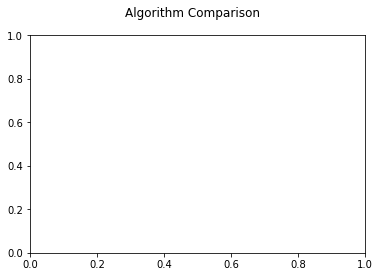

In [10]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [11]:
print(results)

NameError: name 'results' is not defined